In [454]:
# import pandas and numpy libraries
import numpy as np
import pandas as pd

In [455]:
# Load the data set
df = pd.read_csv('spam.csv', encoding='iso-8859-1')

In [456]:
# Displays the first head of data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## STEPS TO ACHIEVE GOALS

In [457]:
# BELOW ARE THE LIST OF OBJECTIVES TO ACHIEVE OUR AIM

# 1. Data cleaninng (Removing all nan values)
# 2. Explolatory Data Analysis (EDA)
# 3. Text Preprocessing
# 4. Model Building and Hyper-parameter-tunning
# 5. Model Evaluation
# 6. Website
# 7. Deployment

## 1. DATA CLEANING

In [458]:
#To see shape of the data
df.shape

(5572, 5)

In [459]:
# displays all null and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [460]:
# From the info above our dataset has missing values from unamed: 2 - unamed: 4.
# so we drop them.
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [461]:
# drop the colums with inplace=True to effect the change
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)


In [462]:
# Check out datasets after dropping NaN columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [463]:
#rename the columns to a more describtive name
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head(20)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [464]:
# displays columns
df.columns

Index(['target', 'text'], dtype='object')

In [465]:
# Get target columns
target = df['target']
print(f'target before encoding:')
target.head(20)

target before encoding:


0      ham
1      ham
2     spam
3      ham
4      ham
5     spam
6      ham
7      ham
8     spam
9     spam
10     ham
11    spam
12    spam
13     ham
14     ham
15    spam
16     ham
17     ham
18     ham
19    spam
Name: target, dtype: object

In [466]:
# Encoding the data labels to numerical category
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X = text

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(df['target'])
df['target'] = encoder.fit_transform(df['target'])


In [467]:
print(f'target after encoding:')
encoded_target[:20]

target after encoding:


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [468]:
df.head(10)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [469]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [470]:
# check for duplicate values
df.duplicated().sum()

403

In [471]:
# drop duplicates and leaving the first
df = df.drop_duplicates(keep='first')

In [472]:
# Check duplicates again
print(f"Duplicate count = {df.duplicated().sum()}")
print(f"Shape is {df.shape}")

Duplicate count = 0
Shape is (5169, 2)


## 2. EXPLORATORY DATA ANALYSIS (EDA)

In [473]:
 df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

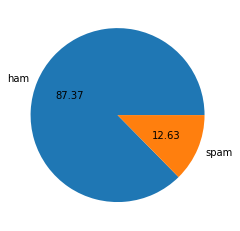

In [474]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [475]:
# We have imbalanced data fro the above

In [476]:
import nltk
import ssl


In [477]:
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [478]:
# Get number of characters
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [479]:
# Get number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [480]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [481]:
# statistical description of dataset
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [482]:
# statistical description of all hams
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [483]:
# statistical description of spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [484]:
import seaborn as sns 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

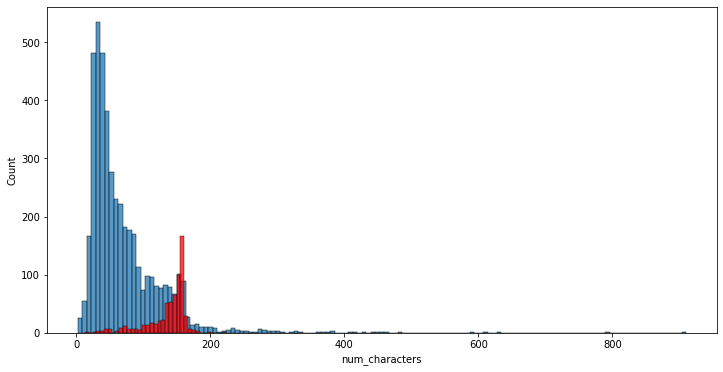

In [485]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

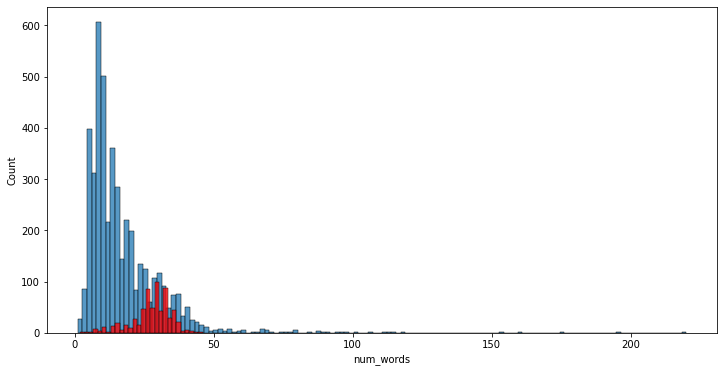

In [486]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Figure size 864x432 with 0 Axes>

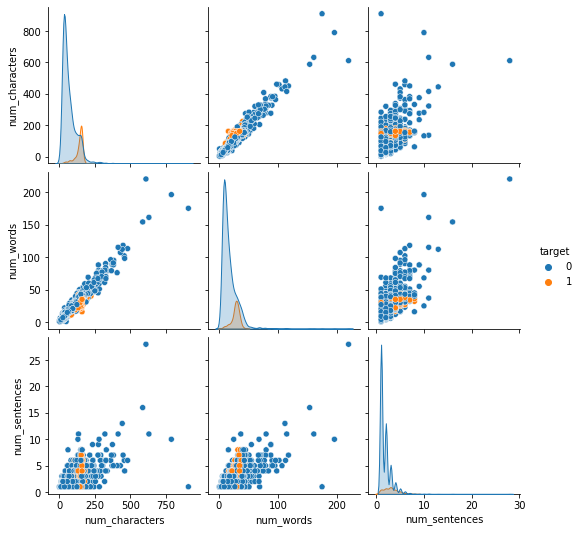

In [487]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='target')

<AxesSubplot:>

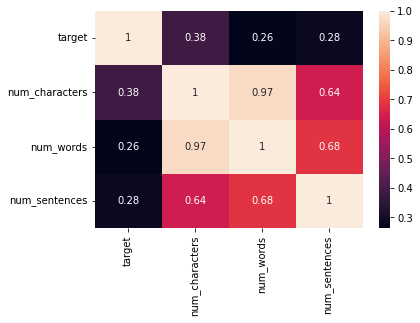

In [488]:
sns.heatmap(df.corr(), annot=True)

## 3. DATA PREPROCESSING
* Lower Casing
* Tokenization
* Removing Special Characters
* Removing Stop Words and Punctuations
* Stemming and Lemmatization

NB: Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. eg:
+ Changing => chang
+ Changed => chang
+ Change => chang

In [489]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [490]:
# view stopwords
''' The stopwords in nltk are the most common words in data. 
They are words that you do not want to use to describe the topic of your content.
'''
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [491]:
# view puctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [492]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

print(ps.stem('Loving'))
print(ps.stem('dancing'))

love
danc


In [493]:
# Defining and implementing our text transform functions
def transform_text(text):
    # tansform to lower case and tokenize
    text = text.lower()
    text = nltk.word_tokenize(text)

    # retain only alpha-numeric words
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    text = y[:]
    y.clear()

    # filter out stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    # perform stemming and lemmatization
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [494]:
transform_text("Do you like my presentation on ML?")

'like present ml'

In [495]:
transform_text("I love the youtube lecture on machine learning, what about you?")

'love youtub lectur machin learn'

In [496]:
print("TEXT NOT TRANSFORMED")
print(df['text'][100])
print('------------------------------')
print("TRANSFORMED TEXT")
transform_text(df['text'][100])

TEXT NOT TRANSFORMED
Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx
------------------------------
TRANSFORMED TEXT


'okay name ur price long legal wen pick u ave x am xx'

In [497]:
df['transformed_text'] = df['text'].apply(transform_text)

df.head(20)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [498]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

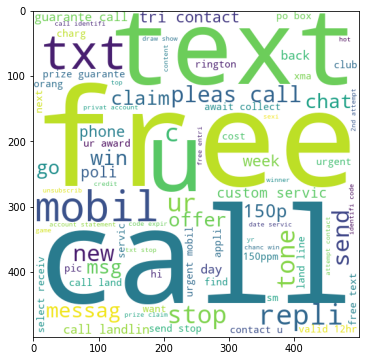

In [499]:
# degree of importance of words classified as spam
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(spam_wc)


+ Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

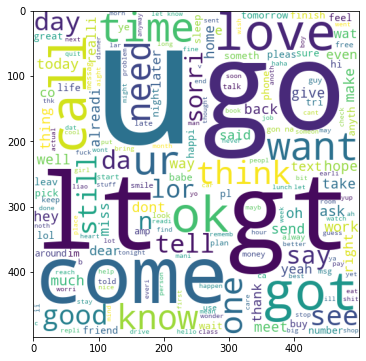

In [500]:
# Degree of importance of words classified as ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 6))
plt.imshow(ham_wc)

In [501]:
spam_corpus = []
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [502]:
len(spam_corpus)

9939

/Users/mac/Desktop/Data-Science/spam-venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


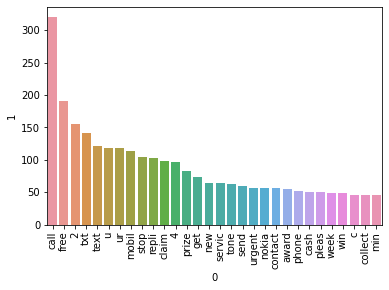

In [503]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [504]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [505]:
len(ham_corpus)

35394

/Users/mac/Desktop/Data-Science/spam-venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


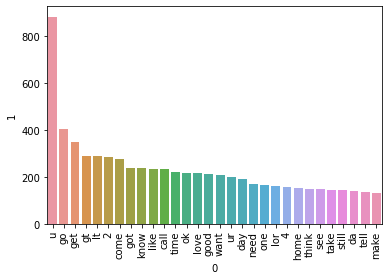

In [506]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. MODEL BUILDING

In [507]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [508]:
 X = tfidf.fit_transform(df['transformed_text']).toarray()

In [509]:
# append the num_character col to X
X = np.hstack((X, df['num_characters'].values.reshape(-1, 1)))
X.shape

(5169, 3001)

In [510]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [511]:
from sklearn.model_selection import train_test_split

In [512]:
# split data into test and train. 20% of test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [513]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [514]:
# Create instances of the bayesian Classes

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [515]:
# GAUSSIAN CLASSIFIER

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)


print(f'Accuracy score: {accuracy_score(y_test, y_pred1)}')


print(f'Precision score: {precision_score(y_test, y_pred1)}')


print(f'confusion matrix: \n {confusion_matrix(y_test, y_pred1)}')

Accuracy score: 0.8907156673114119
Precision score: 0.5615763546798029
confusion matrix: 
 [[807  89]
 [ 24 114]]


In [516]:
# MULTINOMIAL CLASSIFIER

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)


print(f'Accuracy score: {accuracy_score(y_test, y_pred2)}')


print(f'Precision score: {precision_score(y_test, y_pred2)}')


print(f'confusion matrix: \n {confusion_matrix(y_test, y_pred2)}')

Accuracy score: 0.9410058027079303
Precision score: 1.0
confusion matrix: 
 [[896   0]
 [ 61  77]]


In [517]:
# BERNOULLI CLASSIFIER

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)


print(f'Accuracy score: {accuracy_score(y_test, y_pred3)}')


print(f'Precision score: {precision_score(y_test, y_pred3)}')


print(f'confusion matrix: \n {confusion_matrix(y_test, y_pred3)}')

Accuracy score: 0.9835589941972921
Precision score: 0.991869918699187
confusion matrix: 
 [[895   1]
 [ 16 122]]


In [518]:
# tfidf --> MNB

In [519]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier


In [520]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)


In [521]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt
}

In [522]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision


In [523]:
train_classifier(svc, X_train, y_train, X_test, y_test)

/Users/mac/Desktop/Data-Science/spam-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [524]:
accuracy_scores = []
precision_scores = []

for name, clf, in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy ", current_accuracy)
    print("Precision ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


/Users/mac/Desktop/Data-Science/spam-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy  0.8665377176015474
Precision  0.0
For  KN
Accuracy  0.9332688588007737
Precision  0.822429906542056
For  NB
Accuracy  0.9410058027079303
Precision  1.0
For  DT
Accuracy  0.9439071566731141
Precision  0.8703703703703703
For  LR
Accuracy  0.9613152804642167
Precision  0.9622641509433962
For  RF
Accuracy  0.9680851063829787
Precision  0.981651376146789
For  AdaBoost
Accuracy  0.9642166344294004
Precision  0.9316239316239316
For  BgC
Accuracy  0.9661508704061895
Precision  0.8992248062015504
For  ETC
Accuracy  0.9806576402321083
Precision  0.9758064516129032
For  GBDT
Accuracy  0.9516441005802708
Precision  0.9313725490196079


In [525]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [526]:
performance_df 

,Algorithms,Accuracy,Precision
2,NB,0.941006,1.000000
5,RF,0.968085,0.981651
8,ETC,0.980658,0.975806
4,LR,0.961315,0.962264
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.943907,0.870370
1,KN,0.933269,0.822430
0,SVC,0.866538,0.000000


In [527]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithms')

In [528]:
performance_df1

,Algorithms,variable,value
0,NB,Accuracy,0.941006
1,RF,Accuracy,0.968085
2,ETC,Accuracy,0.980658
3,LR,Accuracy,0.961315
4,AdaBoost,Accuracy,0.964217
5,GBDT,Accuracy,0.951644
6,BgC,Accuracy,0.966151
7,DT,Accuracy,0.943907
8,KN,Accuracy,0.933269
9,SVC,Accuracy,0.866538


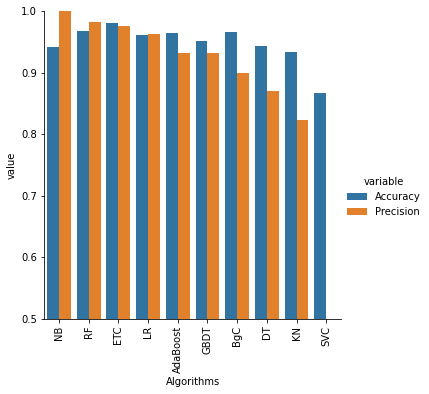

In [529]:
sns.catplot(x= 'Algorithms', y = 'value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [530]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [531]:
temp_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores,'Precision_max_ft_3000':precision_scores })
temp_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy_scaling': accuracy_scores,'Precision_scaling':precision_scores })

In [532]:
new_df = performance_df.merge(temp_df, on='Algorithms')
new_df_scaled = new_df.merge(temp_df, on='Algorithms')

In [533]:

temp_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending=False)

In [535]:
# new_df_scaled.merge(temp_df, on='Algorithms')